### Sistema p-Fuzzy Discreto: População Única

Modelo de crescimento populacional usando regras fuzzy.

**Modelo discreto:**
$$x_{n+1} = x_n + \Delta x$$

onde $\Delta x$ é determinado por regras fuzzy baseadas na população atual.

In [ ]:
!pip install pyfuzzy-toolbox matplotlib numpy -q

In [ ]:
from fuzzy_systems.dynamics import PFuzzyDiscrete, PFuzzyContinuous
from fuzzy_systems.inference import MamdaniSystem
import numpy as np
import matplotlib.pyplot as plt

In [7]:
fis = MamdaniSystem(name="Population")

# Entrada: população atual
fis.add_input('population', (0, 100))
fis.add_term('population', 'baixa', 'gaussian', (10, 10))
fis.add_term('population', 'media', 'gaussian', (50, 12))
fis.add_term('population', 'alta', 'gaussian', (90, 10))

# Saída: variação da população
fis.add_output('d_population', (-10, 10))
fis.add_term('d_population', 'declinio', 'triangular', (-10, -5, 0))
fis.add_term('d_population', 'estavel', 'triangular', (-2, 0, 2))
fis.add_term('d_population', 'crescimento', 'triangular', (0, 5, 10))

# Regras (sintaxe de tupla plana)
fis.add_rules([
    ('baixa', 'crescimento'),
    ('media', 'estavel'),
    ('alta', 'declinio')
])

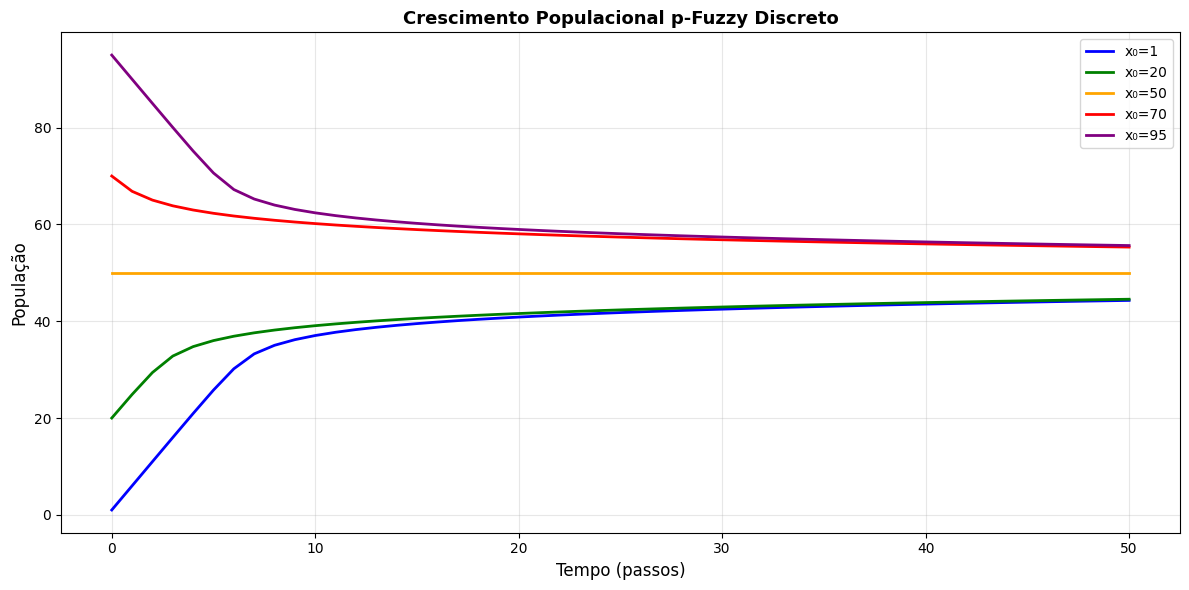

In [11]:
pfuzzy = PFuzzyDiscrete(fis=fis, mode='absolute')

# Diferentes condições iniciais
initial_conditions = [1, 20, 50, 70, 95]
colors = ['blue', 'green', 'orange', 'red', 'purple']

fig, ax = plt.subplots(figsize=(12, 6))

for x0, color in zip(initial_conditions, colors):
    t,traj = pfuzzy.simulate(x0={'population': x0}, n_steps=50)
    ax.plot(t, traj[:, 0], color=color, linewidth=2, label=f'x₀={x0}')

ax.set_xlabel('Tempo (passos)', fontsize=12)
ax.set_ylabel('População', fontsize=12)
ax.set_title('Crescimento Populacional p-Fuzzy Discreto', fontsize=13, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

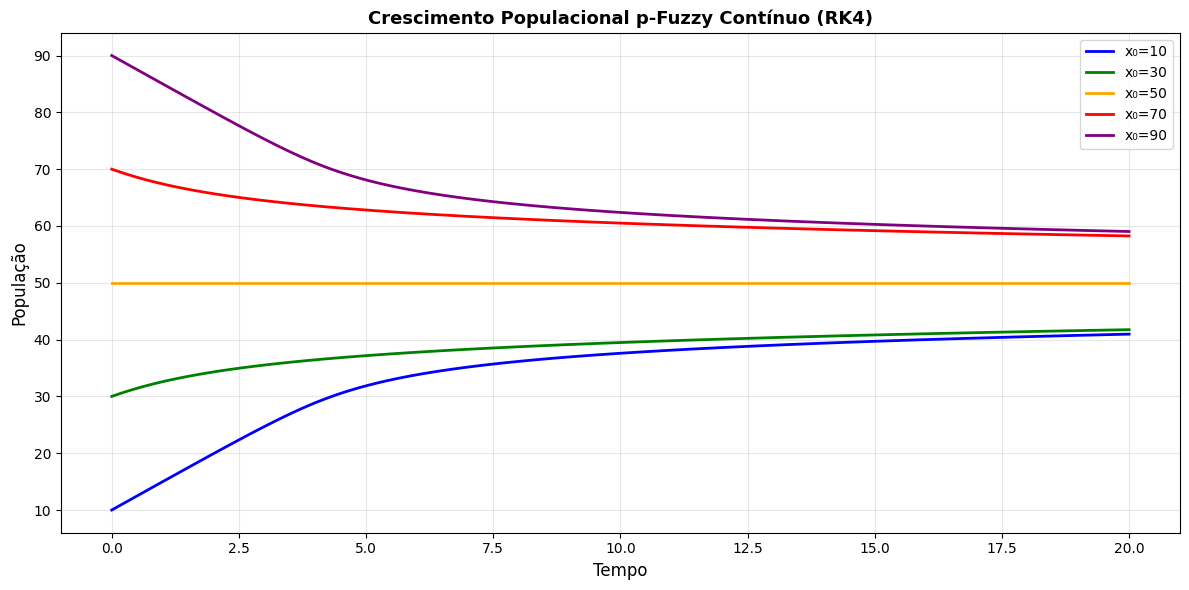

In [12]:
pfuzzy_cnt = PFuzzyContinuous(fis=fis, mode='absolute')

# Diferentes condições iniciais
initial_conditions = [10, 30, 50, 70, 90]
colors = ['blue', 'green', 'orange', 'red', 'purple']

fig, ax = plt.subplots(figsize=(12, 6))

for x0, color in zip(initial_conditions, colors):
    t,traj = pfuzzy_cnt.simulate(x0={'population': x0}, t_span=(0, 20), adaptive=True)
    ax.plot(t, traj[:, 0], color=color, linewidth=2, label=f'x₀={x0}')

ax.set_xlabel('Tempo', fontsize=12)
ax.set_ylabel('População', fontsize=12)
ax.set_title('Crescimento Populacional p-Fuzzy Contínuo (RK4)', fontsize=13, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()